In [1]:
from polynomial_regression import *
from GPR import *
from random_forest import *
import ast

all_labels = ['height', 'phi', 'theta', 
        'impact site x', 'impact site y', 'impact site z', 
        'impact site r', 'impact site phi', 'impact site theta']

number_of_tries = 10
# deciding which features will be kept for the optimiation
# features_to_keep = ['sqrt(angle_btw)', 'sqrt(crack len)', 'sqrt(dist btw frts)', 'angle_btw (unchanged)', 'dist btw frts * mean_kink', 'angle_btw + crack len', 'angle_btw + dist btw frts', 'crack len + dist btw frts']

labels_to_predict = ['height', 'impact site x', 'impact site y']
labels_to_predict = ['height']

model_types = ['RF', 'GPR', 'poly2']
model_types = ['poly2']

# model_types = ['GPR']

# Generate some synthetic data for demonstration purposes
full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_no_feature_engineering/dataset/New_Crack_Len_FULL_OG_dataframe_2023_11_16.csv"
# full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/dataset/feature_transformations_2023-11-16/height/HEIGHTALL_TRANSFORMED_FEATURES.csv"
df = pd.read_csv(full_dataset_pathname, index_col=0)
print(df.columns)

#TODO: temporarily keeping timestep_init
# if(df.columns.__contains__('timestep_init')):
#     df = df.drop('timestep_init', axis=1)

bayesian_opt_results_dir = '/Volumes/Jake_ssd/bayesian_optimization_with_timestep_init'

#Getting all feature names from the DataFrame
all_features = df.columns.tolist()
all_features = [col for col in all_features if col not in all_labels] #gotta remove the labels to get just the features.





Index(['init z', 'init y', 'init x', 'timestep_init', 'max_prop_speed',
       'avg_prop_speed', 'dist btw frts', 'crack len', 'linearity',
       'max thickness', 'mean thickness', 'median_thickness', 'var_thickness',
       'std_thickness', 'thickness_at_init', 'max_kink', 'abs_val_mean_kink',
       'mean_kink', 'sum_kink', 'abs_val_sum_kink', 'median_kink', 'std_kink',
       'var_kink', 'avg_ori', 'angle_btw', 'height', 'phi', 'theta',
       'impact site theta', 'impact site phi', 'impact site r',
       'impact site z', 'impact site y', 'impact site x'],
      dtype='object')


In [2]:
all_features_to_keep = {}
backward_feat_selection_results_folder = '/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/results'
''' get the features to keep based on the best performing features on test sets in backward feature engineering outputs'''
''' only include more than 10 features though for now. '''
min_features = 1
max_features = 25
for label in labels_to_predict:
    all_features_to_keep[label] = {}
    for model_type in model_types:
        performances = pd.read_csv(backward_feat_selection_results_folder + f'/{label}/{model_type}/performances/test_performances.csv')
        #only include rows that have less than 100 features and more than 10 features
        performances = performances.drop(performances[(performances['Unnamed: 0'] < 10) | (performances['Unnamed: 0'] > 100)].index)

        #calculate an average performance across all folds for each feature combination
        performances['average'] = performances[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        row_with_largest_average = performances['average'].idxmax() #get the row index that has the best performance across all folds

        #now get the features that were used for the best performing set of features
        features_kept = pd.read_csv(backward_feat_selection_results_folder + f'/{label}/{model_type}/performances/features_kept.csv')
        best_feature_combination = features_kept.iloc[row_with_largest_average]['features remaining']
        all_features_to_keep[label][model_type] = ast.literal_eval(best_feature_combination)
        
        #TODO DELETE THIS LINE BELOW WHEN ACTUALLY USING THE BEST FEATURES WITH TRANSFORMATIONS/INTERACTIONS
        all_features_to_keep[label][model_type] = all_features
                


 $$$$$$$$$$$$$$$$$$$$$$$$$$ OPTIMIZING A poly2 PREDICTING height $$$$$$$$$$$$$$$$$$$$$$$$$$ 



      init z     init y     init x  timestep_init  max_prop_speed  \
0  54.761764   1.483162  -0.861620             51        4.133932   
1  54.302841 -12.447359 -11.743694             18        3.709363   
2  31.450982 -33.926458  17.610808             61        0.000000   
3  54.761764   1.483162  -0.861620             22        2.099226   
4  46.278199   5.220938 -45.086689             20        1.956465   

   avg_prop_speed  dist btw frts  crack len  linearity  max thickness  ...  \
0        4.133932      11.250136  13.087683   0.956839       4.427145  ...   
1        3.709363       6.650051   8.674746   0.930931       3.753496  ...   
2        0.000000       3.005755   4.345694   1.000000       3.061674  ...   
3        2.099226       5.102357   6.815698   0.979805       4.036392  ...   
4        0.156304      11.201562  12.355626   0.999660       1.808150  ...   

    max_kink  abs_val_mean_kink  mean_kink   sum_kink  abs_val_sum_kink  \
0  13.235115           7.004199  -7.00419

/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+00, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END elasticnet__alpha=0.0010801564116460836, elasticnet__l1_ratio=0.9299584755050435;, score=-1.257 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.919e+00, tolerance: 2.913e-02
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END elasticnet__alpha=0.0010801564116460836, elasticnet__l1_ratio=0.9299584755050435;, score=-0.845 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.008e+00, tolerance: 3.303e-02
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END elasticnet__alpha=0.0010801564116460836, elasticnet__l1_ratio=0.9299584755050435;, score=-0.662 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.439e+00, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END elasticnet__alpha=0.0010801564116460836, elasticnet__l1_ratio=0.9299584755050435;, score=-0.976 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.918e+00, tolerance: 1.590e-02
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END elasticnet__alpha=0.0010801564116460836, elasticnet__l1_ratio=0.9299584755050435;, score=-1.523 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.619e+00, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END elasticnet__alpha=0.01302467718894178, elasticnet__l1_ratio=0.05500295150885374;, score=-1.034 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.418e+00, tolerance: 2.913e-02
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END elasticnet__alpha=0.01302467718894178, elasticnet__l1_ratio=0.05500295150885374;, score=-0.739 total time=   0.2s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.414e+00, tolerance: 3.303e-02
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END elasticnet__alpha=0.01302467718894178, elasticnet__l1_ratio=0.05500295150885374;, score=-0.561 total time=   0.4s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.815e+00, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END elasticnet__alpha=0.01302467718894178, elasticnet__l1_ratio=0.05500295150885374;, score=-0.827 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.461e+00, tolerance: 1.590e-02
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END elasticnet__alpha=0.01302467718894178, elasticnet__l1_ratio=0.05500295150885374;, score=-1.303 total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.852e+00, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END elasticnet__alpha=0.000388757918194155, elasticnet__l1_ratio=0.744102957139344;, score=-1.704 total time=   0.2s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e+01, tolerance: 2.913e-02
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END elasticnet__alpha=0.000388757918194155, elasticnet__l1_ratio=0.744102957139344;, score=-0.905 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+01, tolerance: 3.303e-02
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END elasticnet__alpha=0.000388757918194155, elasticnet__l1_ratio=0.744102957139344;, score=-0.859 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+01, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END elasticnet__alpha=0.000388757918194155, elasticnet__l1_ratio=0.744102957139344;, score=-1.386 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.495e+00, tolerance: 1.590e-02
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END elasticnet__alpha=0.000388757918194155, elasticnet__l1_ratio=0.744102957139344;, score=-2.095 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.657e+00, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END elasticnet__alpha=0.0008512480164062713, elasticnet__l1_ratio=0.23116913869497904;, score=-1.573 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.106e+01, tolerance: 2.913e-02
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END elasticnet__alpha=0.0008512480164062713, elasticnet__l1_ratio=0.23116913869497904;, score=-0.901 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+01, tolerance: 3.303e-02
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END elasticnet__alpha=0.0008512480164062713, elasticnet__l1_ratio=0.23116913869497904;, score=-0.800 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+01, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END elasticnet__alpha=0.0008512480164062713, elasticnet__l1_ratio=0.23116913869497904;, score=-1.298 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.426e+00, tolerance: 1.590e-02
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END elasticnet__alpha=0.0008512480164062713, elasticnet__l1_ratio=0.23116913869497904;, score=-2.051 total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END elasticnet__alpha=0.2252503789114733, elasticnet__l1_ratio=0.9416628511982537;, score=-1.690 total time=   0.0s
[CV 2/5] END elasticnet__alpha=0.2252503789114733, elasticnet__l1_ratio=0.9416628511982537;, score=-0.802 total time=   0.1s
[CV 3/5] END elasticnet__alpha=0.2252503789114733, elasticnet__l1_ratio=0.9416628511982537;, score=-0.291 total time=   0.1s
[CV 4/5] END elasticnet__alpha=0.2252503789114733, elasticnet__l1_ratio=0.9416628511982537;, score=-0.571 total time=   0.1s
[CV 5/5] END elasticnet__alpha=0.2252503789114733, elasticnet__l1_ratio=0.9416628511982537;, score=-1.674 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END elasticnet__alpha=0.7387966194299759, elasticnet__l1_ratio=0.7187252607399471;, score=-1.777 total time=   0.1s
[CV

/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.977e+00, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END elasticnet__alpha=0.00023346296006549204, elasticnet__l1_ratio=0.8513639869657449;, score=-1.858 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.650e+00, tolerance: 2.913e-02
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END elasticnet__alpha=0.00023346296006549204, elasticnet__l1_ratio=0.8513639869657449;, score=-0.946 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.830e+00, tolerance: 3.303e-02
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END elasticnet__alpha=0.00023346296006549204, elasticnet__l1_ratio=0.8513639869657449;, score=-0.919 total time=   0.4s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+01, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END elasticnet__alpha=0.00023346296006549204, elasticnet__l1_ratio=0.8513639869657449;, score=-1.516 total time=   0.2s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.552e+00, tolerance: 1.590e-02
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END elasticnet__alpha=0.00023346296006549204, elasticnet__l1_ratio=0.8513639869657449;, score=-2.199 total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.126e+00, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END elasticnet__alpha=0.0030071002697548916, elasticnet__l1_ratio=0.41817445205195647;, score=-1.137 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.086e+00, tolerance: 2.913e-02
  model = cd_fast.enet_coordinate_descent(


[CV 2/5] END elasticnet__alpha=0.0030071002697548916, elasticnet__l1_ratio=0.41817445205195647;, score=-0.793 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.875e+00, tolerance: 3.303e-02
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END elasticnet__alpha=0.0030071002697548916, elasticnet__l1_ratio=0.41817445205195647;, score=-0.613 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+00, tolerance: 2.945e-02
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END elasticnet__alpha=0.0030071002697548916, elasticnet__l1_ratio=0.41817445205195647;, score=-0.868 total time=   0.3s


/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.835e+00, tolerance: 1.590e-02
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END elasticnet__alpha=0.0030071002697548916, elasticnet__l1_ratio=0.41817445205195647;, score=-1.361 total time=   0.3s

$$$$$$$$$$$$ Results for Poly2 predicting height $$$$$$$$$$$$
$$$$$$$$$$$$ Best parameters found: OrderedDict([('elasticnet__alpha', 0.013300153699806186), ('elasticnet__l1_ratio', 0.6422755334330679)]) $$$$$$$$$$$$
$$$$$$$$$$$$ Best average test score across 5-fold cv: -0.8383561590952576 $$$$$$$$$$$$



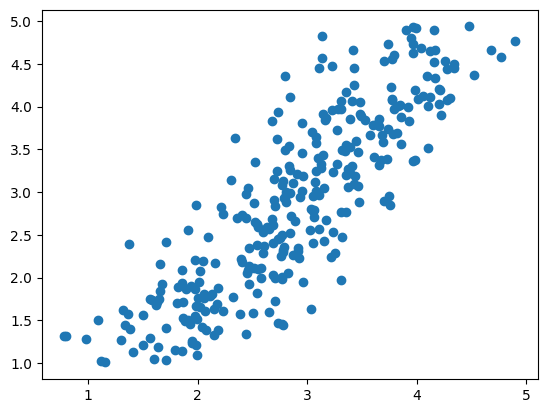

In [4]:
for model_type in model_types:
    for label in labels_to_predict:
        print(f'\n $$$$$$$$$$$$$$$$$$$$$$$$$$ OPTIMIZING A {model_type} PREDICTING {label} $$$$$$$$$$$$$$$$$$$$$$$$$$ \n')
        features_to_keep = all_features_to_keep[label][model_type]
        saving_dir = f'{bayesian_opt_results_dir}/{label}'
        if(not os.path.exists(f'{saving_dir}/{model_type}')): os.makedirs(f'{saving_dir}/{model_type}')
        
        label_df = df.copy()[label]
        '''if there are defined features to keep, then only keep the defined ones. otherwise, just remove the labels for feat_df'''
        if(features_to_keep != 'ALL'):
            feat_df = df[features_to_keep]
        else:
            feat_df = df.drop(all_labels, axis=1)
        
        print(feat_df.head())
        if(model_type =='GPR'):
            model = do_bayesian_optimization_GPR(feat_df, label_df, num_tries=number_of_tries, saving_folder= saving_dir+'/GPR')
        elif(model_type == 'RF'):
            model = do_bayesian_optimization_RF(feat_df, label_df, num_tries=number_of_tries, saving_folder= saving_dir+'/RF')
        elif(model_type == 'poly2'):
            model = do_bayesian_optimization_poly_reg(feat_df, label_df, num_tries=number_of_tries, saving_folder= saving_dir+'/poly2')